<h1>Resolution parameter study</h1>

This notebook analyzes how the resolution parameter affects community detection in Venice’s public transport networks. By calculating modularity scores for different resolution values across real, rewired, and Erdős-Rényi random networks, it identifies the optimal parameter settings for revealing meaningful community structure. The results help determine which configurations best capture the modular organization of these networks.
This notebook will calculate different combinations of networks and resolution parameter values to identify the best configuration for this task.

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

n_file=["carnival_tourist","no_carnival_tourist","carnival_residents","no_carnival_residents"]
n_folder='../Data/'

<h2> Rewiring</h2>

The same nodes, the same number of edges, and the same weights are used. The edges and the weights of each edge are redistributed.

In [3]:
def rewiring(G_original): 
    """
    The same nodes, the same number of edges, and the same weights are used. The edges and the weights of each edge are redistributed.
    :param G_original: networkX DiGraph 
    :type G_original: Graph
    :return: new rewiring graph with weights
    :rtype: DiGraph
    """
    #Obtain original nodes and weights
    nodos = list(G_original.nodes())
    pesos = [G_original[u][v]['weight'] for u, v in G_original.edges()]
    num_aristas = G_original.number_of_edges()
    
    #Create new network with same nodes
    G_random = nx.DiGraph() 
    G_random.add_nodes_from(nodos)
    
    #Generate random edges without repetition
    posibles_aristas = [(u, v) for u in nodos for v in nodos if u != v]
    aristas_aleatorias = random.sample(posibles_aristas, num_aristas)
    
    #Mix the weights 
    random.shuffle(pesos)
    
    #Assign weights to random edges
    for (u, v), peso in zip(aristas_aleatorias, pesos):
        G_random.add_edge(u, v, weight=peso)
    return G_random

<h1>Erdős-Rényi</h1>

The Erdáros-Rényi network is characterized by the maintenance of identical nodes as the original network

In [4]:
def erdos_renyi_weighted_same_nodes(G_original, weight_range=(0.1, 1.0), directed=True, seed=None):
    """
    Generates an Erdős-Rényi network with the same nodes and number of edges as G_original, and assigns random weights to the edges.
    :param G_original: networkX DiGraph.
    :type G_original: DiGraph
    :param weight_range: tuple with the range of weights (min, max)
    :type weight_range: tuple
    :param directed: if True, generates a directed graph
    :type directed: bool
    :param seed: optional random seed
    :type seed: int
    :return: new random graph with weights
    :rtype: DiGraph
    """
    rng = random.Random(seed)
    n = G_original.number_of_nodes()
    m = G_original.number_of_edges()
    
    # Create an empty graph with the same nodes
    G_rand = nx.DiGraph() if directed else nx.Graph()
    G_rand.add_nodes_from(G_original.nodes())

    possible_edges = [(u, v) for u in G_rand.nodes() for v in G_rand.nodes() if u != v]
    if not directed:
        possible_edges = [(u, v) for u, v in possible_edges if u < v]

    rng.shuffle(possible_edges)
    selected_edges = possible_edges[:m]

    for u, v in selected_edges:
        weight = rng.uniform(*weight_range)
        G_rand.add_edge(u, v, weight=weight)

    return G_rand

<h2>Venice networks </h2>

Calculation of the modularity of the communities obtained by Louvain depending on the value of the resolution parameter.

In [ ]:
resolutions = np.linspace(0.5, 2.0, 16)
dict_mod=dict()


for i in n_file:
    G=nx.read_graphml(n_folder+i+'.graphml')
    dict_mod[i]=list()
    for j in resolutions:
        cm=nx.community.louvain_communities(G,resolution=j)
        modularity = nx.community.modularity(G,cm)

        dict_mod[i].append(modularity)

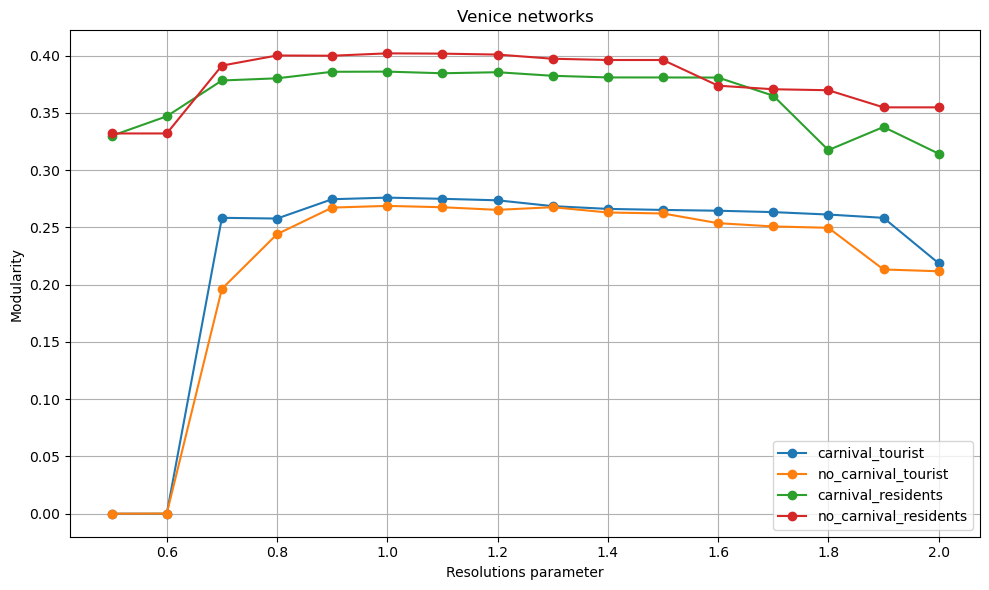

In [6]:
x = resolutions
# Create graph
plt.figure(figsize=(10, 6))

# Draw each line
for label, values in dict_mod.items():
    plt.plot(x, values, marker='o', label=label)

# Add labels and captions
plt.title('Venice networks')
plt.xlabel('Resolutions parameter')
plt.ylabel('Modularity')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<h2>Rewering networks </h2>

Calculation of the modularity of the communities obtained by Louvain depending on the value of the resolution parameter.

In [7]:
resolutions = np.linspace(0.5, 2.0, 16)
dict_mod=dict()


for i in n_file:
    G=rewiring(nx.read_graphml(n_folder+i+'.graphml'))
    dict_mod[i]=list()
    for j in resolutions:
        cm=nx.community.louvain_communities(G,resolution=j)
        modularity = nx.community.modularity(G,cm)

        dict_mod[i].append(modularity)


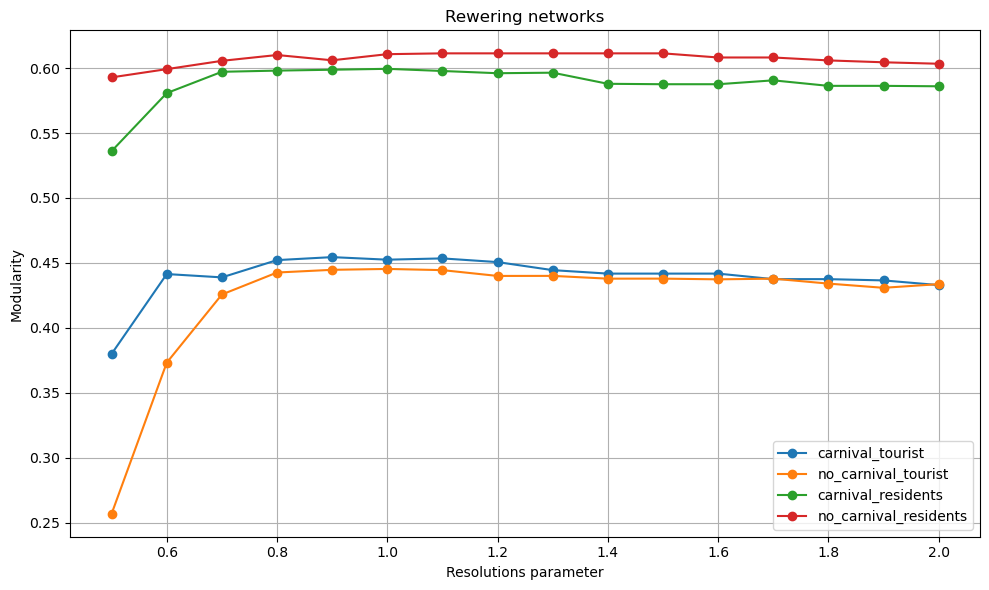

In [8]:
x = resolutions
# Create graph
plt.figure(figsize=(10, 6))

# Drawing each line
for label, values in dict_mod.items():
    plt.plot(x, values, marker='o', label=label)

# Add labels and captions
plt.title('Rewering networks')
plt.xlabel('Resolutions parameter')
plt.ylabel('Modularity')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<h2>Erdős-Rényi networks </h2>

Calculation of the modularity of the communities obtained by Louvain depending on the value of the resolution parameter.
In the case of the model under consideration, the generated network displays a configuration with an equal number of nodes, while the link weights fluctuate within the range of the maximum and minimum value corresponding to each of the networks.

In [9]:
resolutions = np.linspace(0.5, 2.0, 16)
dict_mod=dict()


for i in n_file:
    G=nx.read_graphml(n_folder+i+'.graphml')
    pesos = [d['weight'] for u, v, d in G.edges(data=True) if 'weight' in d]

    # Obtain minimum and maximum
    peso_min = min(pesos)
    peso_max = max(pesos)
    G=erdos_renyi_weighted_same_nodes(G, weight_range=(peso_min, peso_max), directed=True, seed=None)
    
    dict_mod[i]=list()
    for j in resolutions:
        cm=nx.community.louvain_communities(G,resolution=j)
        modularity = nx.community.modularity(G,cm)

        dict_mod[i].append(modularity)


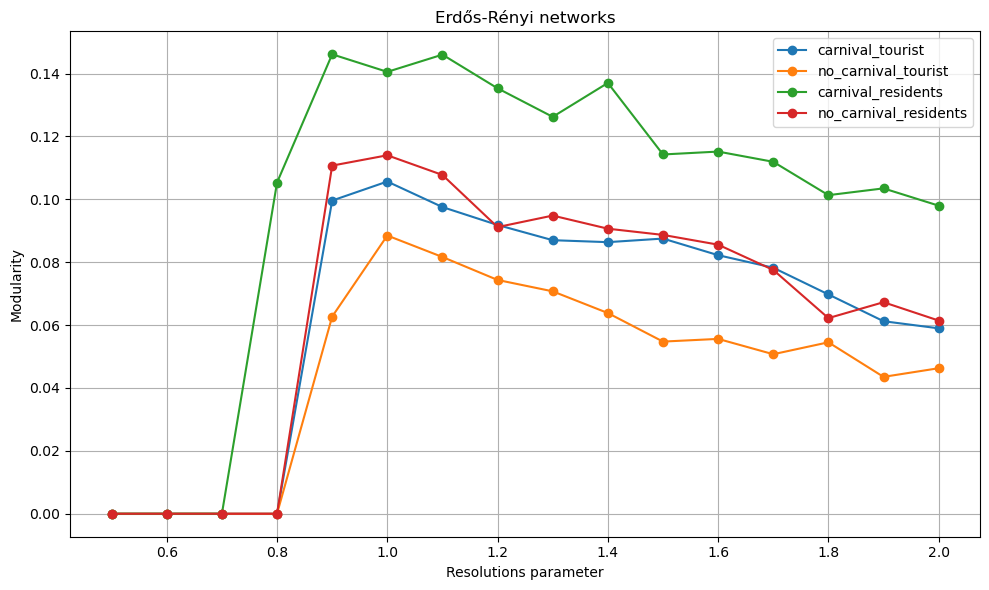

In [10]:
x = resolutions
# Create graph
plt.figure(figsize=(10, 6))

# Drawing each line
for label, values in dict_mod.items():
    plt.plot(x, values, marker='o', label=label)

# Add labels and captions
plt.title('Erdős-Rényi networks')
plt.xlabel('Resolutions parameter')
plt.ylabel('Modularity')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<h1>Conclusion</h1>

An analysis of the data reveals that, in nearly all graphs, the optimal value is 1. It is evident that lower values result in suboptimal outcomes when assessing modularity. Higher values do not yield superior results. Moreover, in instances where 1 is not the optimal value, there are no substantial differences.